In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [17]:
!wget https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt/download?datasetVersionNumber=1

--2022-08-04 09:14:49--  https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fdanielwillgeorge%2Fglove6b100dtxt%2Fversions%2F1%3Fresource%3Ddownload [following]
--2022-08-04 09:14:49--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fdanielwillgeorge%2Fglove6b100dtxt%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=1’

download?datasetVer     [ <=>                ]   6.48K  --

In [18]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-08-04 09:16:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-08-04 09:16:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-08-04 09:16:32--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:
toxic_comments = pd.read_csv("/content/output.csv", index_col=0)


In [31]:
print(toxic_comments.shape)

toxic_comments.head()

(1242, 55)


,email,text,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
0,174119,message cut conclusion continue need address k...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,125766,today news weekend follow order year later ene...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,52167,vince ive hearing rumor decide endorse nodal p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,221197,jim able provide dan meeting would appreciate ...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,150202,stan understand completely best achieve desire...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
toxic_comments_labels = toxic_comments[['4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10',
       '4.11', '4.12', '4.13', '4.14', '4.15', '4.16', '4.17', '4.18', '4.19',
       '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11', '2.12',
       '2.13', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9',
       '3.10', '3.11', '3.12', '3.13']]
toxic_comments_labels.head()

,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


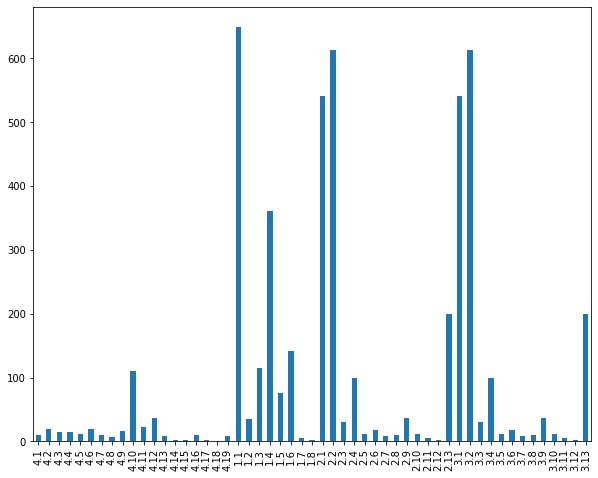

In [33]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()

In [34]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [35]:
X = []
sentences = list(toxic_comments["text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = toxic_comments_labels.values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [16]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [20]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/gdrive/MyDrive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [22]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(53, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [23]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 100)          1214800   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 53)                6837      
                                                                 
Total params: 1,338,885
Trainable params: 124,085
Non-trainable params: 1,214,800
_________________________________________________________________
None


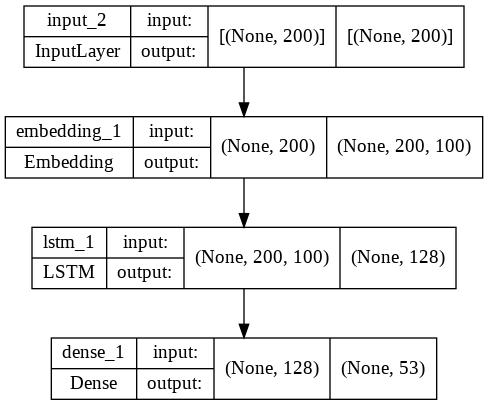

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [27]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.1734 - acc: 0.2103 - val_loss: 0.1697 - val_acc: 0.3819
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.1702 - acc: 0.4005 - val_loss: 0.1684 - val_acc: 0.3819
Epoch 3/10
7/7 [==============================] - 5s 644ms/step - loss: 0.1690 - acc: 0.1587 - val_loss: 0.1680 - val_acc: 0.0251
Epoch 4/10
7/7 [==============================] - 5s 745ms/step - loss: 0.1681 - acc: 0.0605 - val_loss: 0.1679 - val_acc: 0.3769
Epoch 5/10
7/7 [==============================] - 6s 778ms/step - loss: 0.1677 - acc: 0.4005 - val_loss: 0.1677 - val_acc: 0.3819
Epoch 6/10
7/7 [==============================] - 5s 643ms/step - loss: 0.1674 - acc: 0.4005 - val_loss: 0.1675 - val_acc: 0.3769
Epoch 7/10
7/7 [==============================] - 5s 655ms/step - loss: 0.1671 - acc: 0.3992 - val_loss: 0.1675 - val_acc: 0.3819
Epoch 8/10
7/7 [==============================] - 5s 655ms/step - loss: 0.1671 - acc: 0.4005 - 

In [28]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

8/8 [==============================] - 1s 166ms/step - loss: 0.1731 - acc: 0.4016
Test Score: 0.17305944859981537
Test Accuracy: 0.4016064405441284


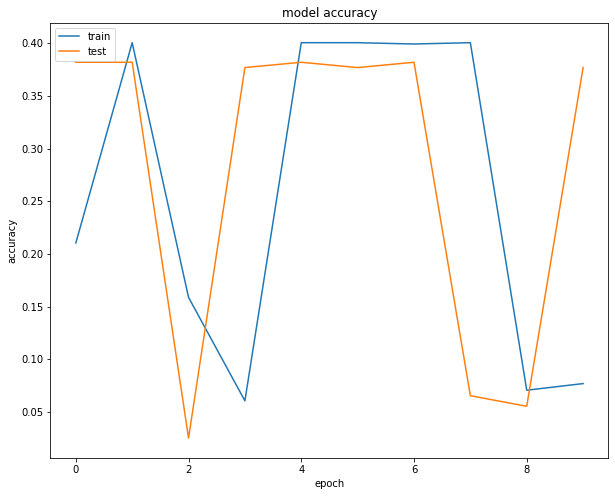

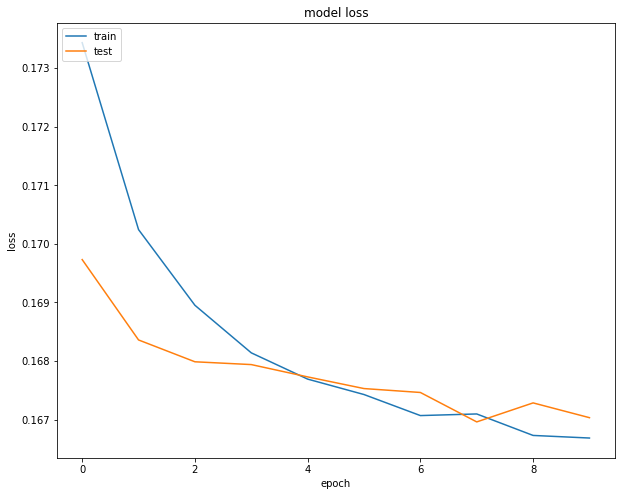

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [3]:



project_path='/content/'



In [6]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Conv1D, Bidirectional
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras import optimizers
from keras.layers import TimeDistributed
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

from sklearn.preprocessing import LabelEncoder
from keras import callbacks

def create_model_BiLSTM(vocabulary_size,embedding_size,embedding_matrix,num_class=53):
    ## create model
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, weights=[embedding_matrix],trainable=False))

    model.add(Bidirectional(LSTM(300)))


    model.add(Dense(num_class, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()
    return model

In [9]:
import pandas as pd

df = pd.read_csv(project_path + 'output.csv', index_col=0)

df.head()

,email,text,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
0,174119,message cut conclusion continue need address k...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,125766,today news weekend follow order year later ene...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,52167,vince ive hearing rumor decide endorse nodal p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,221197,jim able provide dan meeting would appreciate ...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,150202,stan understand completely best achieve desire...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
texts=df['text']

In [14]:
df.iloc[:,2:55]

,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1238,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1240,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
label=df.iloc[:,2:55].values

In [15]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
with open(project_path + 'pickle_clean_text_Xy.pickle','wb') as f:
    pickle._dump((texts,label),f)

In [18]:
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import pickle

from sklearn.preprocessing import LabelEncoder

vocabulary_size = 400000
#***********
time_step=300
embedding_size=100

pickle_train=open(project_path + 'pickle_clean_text_Xy.pickle','rb')
texts,y_train=pickle.load(pickle_train)

tokenizer_train=Tokenizer(num_words=vocabulary_size)
tokenizer_train.fit_on_texts(texts)
encoded_train=tokenizer_train.texts_to_sequences(texts=texts)
#print(encoded_docs)
vocab_size_train = len(tokenizer_train.word_index) + 1
print(vocab_size_train)

X_train = sequence.pad_sequences(encoded_train, maxlen=time_step,padding='post')


f = open(project_path + 'gdrive/MyDrive/glove.6B.100d.txt',encoding='utf-8')
embeddings_train={}
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_train[word] = coefs
f.close()

print('Total %s word vectors.' % len(embeddings_train))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size_train, embedding_size))
for word, i in tokenizer_train.word_index.items():
	embedding_vector_train = embeddings_train.get(word)
	if embedding_vector_train is not None:
		embedding_matrix[i] = embedding_vector_train


with open(project_path + 'pickle_doc_embedding_100dim.pickle','wb') as f:
    pickle.dump((X_train,y_train,embedding_matrix),f)

13178
Total 400000 word vectors.


In [19]:
!pip install -q iterative-stratification

import glob

import os
#from sklearn.model_selection import KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import gc
import keras.backend as K
import numpy as np

pickle_load=open(project_path + 'pickle_doc_embedding_100dim.pickle','rb')
X_train_all,y_train_all,embedding_matrix=pickle.load(pickle_load)

print(X_train_all.shape)
print(y_train_all.shape)

num_cross_validation = 5


mskf = MultilabelStratifiedKFold(n_splits = num_cross_validation, shuffle=True, random_state=42)
pred_list=[]
cvscores = []
y_true_all_fold = []
pred_binary_all_fold = []

Fold = 1

for train, val in mskf.split(X_train_all, y_train_all):
    gc.collect()
    K.clear_session()
    print('Fold: ', Fold)

    X_train = X_train_all[train]
    X_val = X_train_all[val]
    y_train = y_train_all[train]
    y_val = y_train_all[val]

    vocabulary_size=embedding_matrix.shape[0]
    model=create_model_BiLSTM(vocabulary_size,embedding_size,embedding_matrix, num_class=53)
    history=model.fit(X_train,y_train,batch_size=256,epochs=10,validation_split=0.1,shuffle=True)



    pred=model.predict(X_val)


    pred_binary=np.array(pred)
    for i in range(len(pred_binary)):
      for j in range(len(pred_binary[i])):
        pred_binary[i][j]=int(1*(pred_binary[i][j]>0.5))

      y_true_all_fold.append(y_val[i])
      pred_binary_all_fold.append(pred_binary[i])

    Fold = Fold + 1

(1242, 300)
(1242, 53)
Fold:  1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1317800   
                                                                 
 bidirectional (Bidirectiona  (None, 600)              962400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 53)                31853     
                                                                 
Total params: 2,312,053
Trainable params: 994,253
Non-trainable params: 1,317,800
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 52s 11s/step - loss: 0.6426 - accuracy: 0.1242 - val_loss: 0.4854 - val_accuracy: 0.3700
Epoch 2/10
4/4 [==============================] - 37s 9s/step - los

KeyboardInterrupt: ignored